### Load the necessary libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing

import numpy.random as nr
import scipy.stats as ss
import math
#import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics

%matplotlib inline



<center><h2><i>TRAIN & TEST DATASETS</i></h2></center>

### Load the datasets

In [143]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
merged = pd.concat([train,test])

In [4]:
display(merged.head())

,Product_Fat_Content,Product_Identifier,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Type,Product_Weight,Supermarket _Size,Supermarket_Identifier,Supermarket_Location_Type,Supermarket_Opening_Year,Supermarket_Type
0,Low Fat,DRA12,357.54,0.068535,DRA12_CHUKWUDI010,709.08,Soft Drinks,11.6,NaN,CHUKWUDI010,Cluster 3,2005,Grocery Store
1,Low Fat,DRA12,355.79,0.040912,DRA12_CHUKWUDI013,6381.69,Soft Drinks,11.6,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1
2,Low Fat,DRA12,350.79,0.041178,DRA12_CHUKWUDI017,6381.69,Soft Drinks,11.6,NaN,CHUKWUDI017,Cluster 2,2014,Supermarket Type1
3,Low Fat,DRA12,355.04,0.041113,DRA12_CHUKWUDI018,2127.23,Soft Drinks,11.6,Medium,CHUKWUDI018,Cluster 3,2016,Supermarket Type2
4,Ultra Low fat,DRA12,354.79,0.000000,DRA12_CHUKWUDI035,2481.77,Soft Drinks,11.6,Small,CHUKWUDI035,Cluster 2,2011,Supermarket Type1


In [10]:
bold('**Train/Test shape:**')
display(train_data.shape,test_data.shape,merged.shape)

**Train/Test shape:**

(4990, 13)

(3532, 12)

(8522, 13)

In [5]:
merged.dtypes

Product_Fat_Content                object
Product_Identifier                 object
Product_Price                     float64
Product_Shelf_Visibility          float64
Product_Supermarket_Identifier     object
Product_Supermarket_Sales         float64
Product_Type                       object
Product_Weight                    float64
Supermarket _Size                  object
Supermarket_Identifier             object
Supermarket_Location_Type          object
Supermarket_Opening_Year            int64
Supermarket_Type                   object
dtype: object

In [13]:
bold('**Merged data:**')
display(merged.iloc[4986:4999,:])

**Merged data:**

,Product_Fat_Content,Product_Identifier,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Type,Product_Weight,Supermarket _Size,Supermarket_Identifier,Supermarket_Location_Type,Supermarket_Opening_Year,Supermarket_Type
4986,Low Fat,NCZ54,410.14,0.082956,NCZ54_CHUKWUDI027,13808.69,Household,NaN,Medium,CHUKWUDI027,Cluster 3,1992,Supermarket Type3
4987,Low Fat,NCZ54,406.14,0.083528,NCZ54_CHUKWUDI045,5685.93,Household,14.650,NaN,CHUKWUDI045,Cluster 2,2009,Supermarket Type1
4988,Low Fat,NCZ54,404.89,0.083359,NCZ54_CHUKWUDI046,11778.00,Household,14.650,Small,CHUKWUDI046,Cluster 1,2004,Supermarket Type1
4989,Low Fat,NCZ54,403.39,0.083489,NCZ54_CHUKWUDI049,17870.07,Household,14.650,Medium,CHUKWUDI049,Cluster 1,2006,Supermarket Type1
0,Normal Fat,DRA59,459.98,0.214125,DRA59_CHUKWUDI010,NaN,Soft Drinks,8.270,NaN,CHUKWUDI010,Cluster 3,2005,Grocery Store
1,Normal Fat,DRA59,464.98,0.127821,DRA59_CHUKWUDI013,NaN,Soft Drinks,8.270,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1
2,Low Fat,DRB01,477.38,0.082171,DRB01_CHUKWUDI013,NaN,Soft Drinks,7.390,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1
3,Normal Fat,DRB13,472.63,0.011791,DRB13_CHUKWUDI010,NaN,Soft Drinks,6.115,NaN,CHUKWUDI010,Cluster 3,2005,Grocery Store
4,Normal Fat,DRB13,473.13,0.007038,DRB13_CHUKWUDI013,NaN,Soft Drinks,6.115,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1
5,Low Fat,DRB25,268.73,0.069853,DRB25_CHUKWUDI017,NaN,Soft Drinks,12.300,NaN,CHUKWUDI017,Cluster 2,2014,Supermarket Type1


In [144]:
merged.columns = [str.replace(' _', '_') for str in merged.columns]

In [7]:
display(merged.columns)

Index(['Product_Fat_Content', 'Product_Identifier', 'Product_Price',
       'Product_Shelf_Visibility', 'Product_Supermarket_Identifier',
       'Product_Supermarket_Sales', 'Product_Type', 'Product_Weight',
       'Supermarket_Size', 'Supermarket_Identifier',
       'Supermarket_Location_Type', 'Supermarket_Opening_Year',
       'Supermarket_Type'],
      dtype='object')

train_data.groupby(['Supermarket_Opening_Year','Supermarket_Identifier','Supermarket_Type','Supermarket_Location_Type','Supermarket_Size'])['Supermarket_Size'].count()

In [8]:
"""Let's count the missing values for each variable."""
display(merged.isnull().sum())

Product_Fat_Content                  0
Product_Identifier                   0
Product_Price                        0
Product_Shelf_Visibility             0
Product_Supermarket_Identifier       0
Product_Supermarket_Sales         3532
Product_Type                         0
Product_Weight                    1463
Supermarket_Size                  2409
Supermarket_Identifier               0
Supermarket_Location_Type            0
Supermarket_Opening_Year             0
Supermarket_Type                     0
dtype: int64

In [145]:
# Remove the Product_Weight column
merged.drop(['Product_Weight','Product_Fat_Content'], axis=1, inplace=True)

In [136]:
"""Let's count the missing values for each variable."""
display(merged.isnull().sum())

Product_Identifier                   0
Product_Price                        0
Product_Shelf_Visibility             0
Product_Supermarket_Identifier       0
Product_Supermarket_Sales         3532
Product_Type                         0
Supermarket_Size                  2409
Supermarket_Identifier               0
Supermarket_Location_Type            0
Supermarket_Opening_Year             0
Supermarket_Type                     0
dtype: int64

### Correlation, Feature Selection and Feature Extraction

## Bar Chart

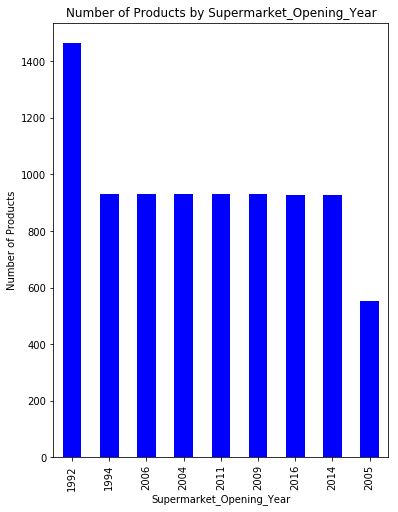

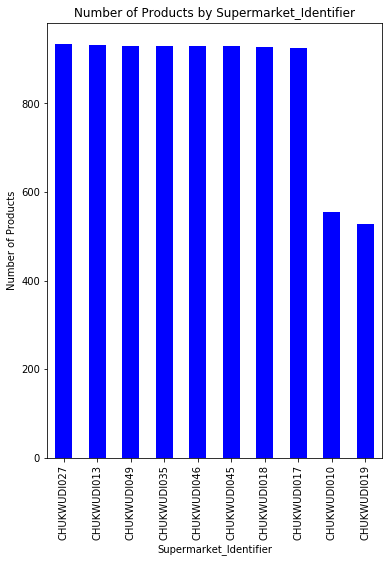

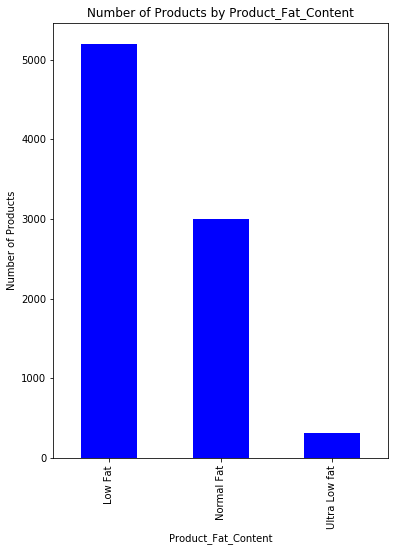

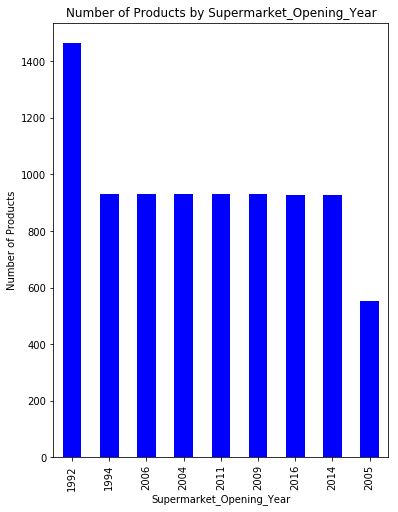

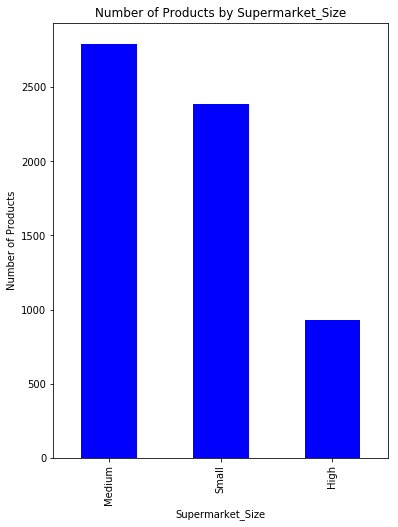

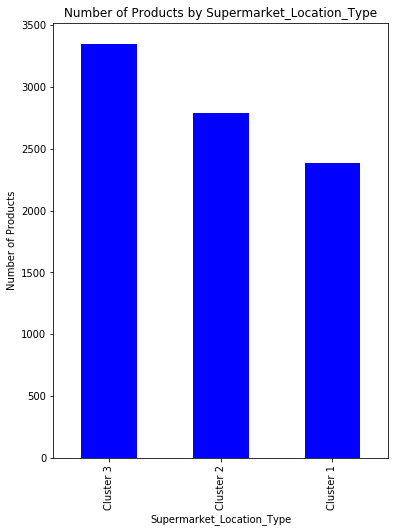

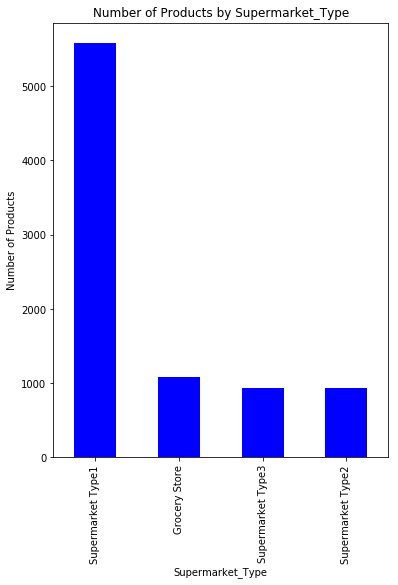

In [13]:
def plot_bars(train_data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,8)) # define plot area
        ax = fig.gca() # define axis    
        counts = train_data[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of Products by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Products')# Set text for y axis
        plt.show()

cat_cols = ['Supermarket_Opening_Year','Supermarket_Identifier','Product_Fat_Content',
            'Supermarket_Size','Supermarket_Location_Type', 'Supermarket_Type']
plot_bars(merged, cat_cols)  

## DistPlot >> Histogram

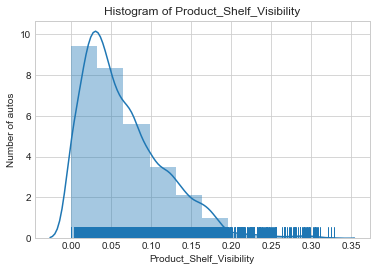

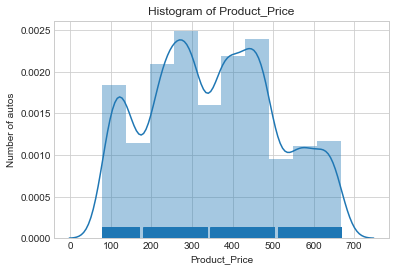

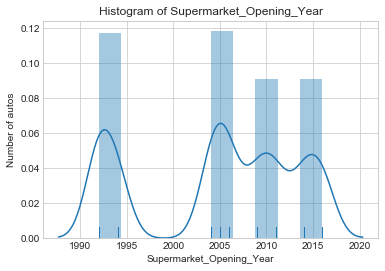

In [16]:
def plot_density_hist(train_data, cols, bins = 10, hist = True):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(train_data[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()
        
num_cols = ['Product_Shelf_Visibility','Product_Price', 'Supermarket_Opening_Year']
plot_density_hist(merged, num_cols)    

In [76]:
#pow(merged['Product_Price'],0.5).hist()
#pow(merged[['Product_Price','Product_Shelf_Visibility','Product_Supermarket_Sales']],0.5).hist(bins=50)

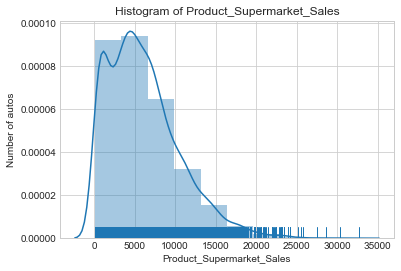

In [14]:
plot_density_hist(train, ['Product_Supermarket_Sales'])

## Transforming Numerical Features

In [18]:
train['Product_Supermarket_Sales'].describe()

count     4990.000000
mean      6103.520164
std       4447.333835
min         83.230000
25%       2757.660000
50%       5374.675000
75%       8522.240000
max      32717.410000
Name: Product_Supermarket_Sales, dtype: float64

In [19]:
np.log(train['Product_Supermarket_Sales']).describe()

count    4990.000000
mean        8.340300
std         1.030155
min         4.421608
25%         7.922137
50%         8.589453
75%         9.050434
max        10.395663
Name: Product_Supermarket_Sales, dtype: float64

,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Sales
count,8522.000000,8522.000000,4990.000000
mean,352.471687,0.066134,6103.520164
std,155.693760,0.051600,4447.333835
min,78.230000,0.000000,83.230000
25%,234.542500,0.026988,2757.660000
50%,357.450000,0.053935,5374.675000
75%,464.130000,0.094594,8522.240000
max,667.220000,0.328391,32717.410000


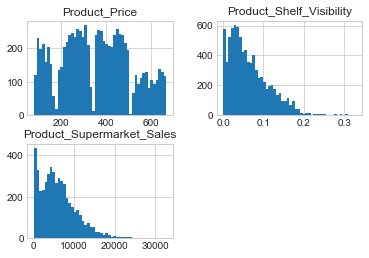

In [86]:
merged[['Product_Price','Product_Shelf_Visibility','Product_Supermarket_Sales']].hist(bins=50)
display(merged[['Product_Price','Product_Shelf_Visibility','Product_Supermarket_Sales']].describe())

,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Sales
count,8522.000000,8522.000000,4990.000000
mean,18.257139,0.233711,72.280887
std,4.376165,0.107307,29.650795
min,8.844772,0.000000,9.123048
25%,15.314780,0.164280,52.513423
50%,18.906348,0.232239,73.312174
75%,21.543677,0.307562,92.315979
max,25.830602,0.573054,180.879546


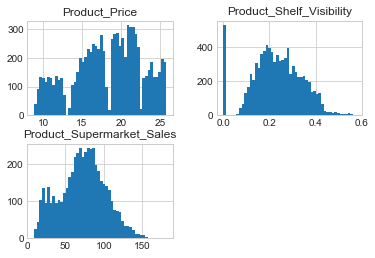

In [90]:
pow(merged[['Product_Price','Product_Shelf_Visibility','Product_Supermarket_Sales']],0.5).hist(bins=50)
display(pow(merged[['Product_Price','Product_Shelf_Visibility','Product_Supermarket_Sales']],0.5).describe())

In [147]:
merged['Product_Supermarket_Sales_Pow'] = pow(merged['Product_Supermarket_Sales'],0.5)
merged['Product_Price_Pow'] = pow(merged['Product_Price'],0.5)
merged['Product_Shelf_Visibility_Pow'] = pow(merged['Product_Shelf_Visibility'],0.5)

merged.head(10)

,Product_Identifier,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Type,Supermarket_Size,Supermarket_Identifier,Supermarket_Location_Type,Supermarket_Opening_Year,Supermarket_Type,Product_Supermarket_Sales_Pow,Product_Price_Pow,Product_Shelf_Visibility_Pow
0,DRA12,357.54,0.068535,DRA12_CHUKWUDI010,709.08,Soft Drinks,NaN,CHUKWUDI010,Cluster 3,2005,Grocery Store,26.628556,18.908728,0.261792
1,DRA12,355.79,0.040912,DRA12_CHUKWUDI013,6381.69,Soft Drinks,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1,79.885481,18.862396,0.202267
2,DRA12,350.79,0.041178,DRA12_CHUKWUDI017,6381.69,Soft Drinks,NaN,CHUKWUDI017,Cluster 2,2014,Supermarket Type1,79.885481,18.729389,0.202922
3,DRA12,355.04,0.041113,DRA12_CHUKWUDI018,2127.23,Soft Drinks,Medium,CHUKWUDI018,Cluster 3,2016,Supermarket Type2,46.121904,18.842505,0.202763
4,DRA12,354.79,0.000000,DRA12_CHUKWUDI035,2481.77,Soft Drinks,Small,CHUKWUDI035,Cluster 2,2011,Supermarket Type1,49.817366,18.835870,0.000000
5,DRA12,354.04,0.000000,DRA12_CHUKWUDI045,9572.54,Soft Drinks,NaN,CHUKWUDI045,Cluster 2,2009,Supermarket Type1,97.839358,18.815951,0.000000
6,DRA24,409.72,0.066832,DRA24_CHUKWUDI010,818.93,Soft Drinks,NaN,CHUKWUDI010,Cluster 3,2005,Grocery Store,28.616953,20.241541,0.258518
7,DRA24,406.22,0.039895,DRA24_CHUKWUDI013,11055.61,Soft Drinks,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1,105.145661,20.154900,0.199737
8,DRA24,411.72,0.040154,DRA24_CHUKWUDI017,2866.27,Soft Drinks,NaN,CHUKWUDI017,Cluster 2,2014,Supermarket Type1,53.537557,20.290885,0.200385
9,DRA24,408.22,0.069909,DRA24_CHUKWUDI019,1228.40,Soft Drinks,Small,CHUKWUDI019,Cluster 1,1992,Grocery Store,35.048538,20.204455,0.264403


In [160]:
merged['Product_Shelf_Visibility_Exp'] = np.exp(merged['Product_Shelf_Visibility'])

,Product_Price,Product_Supermarket_Sales
count,8522.000000,4990.000000
mean,5.744433,8.340300
std,0.526114,1.030155
min,4.359653,4.421608
25%,5.457637,7.922137
50%,5.878995,8.589453
75%,6.140165,9.050434
max,6.503120,10.395663


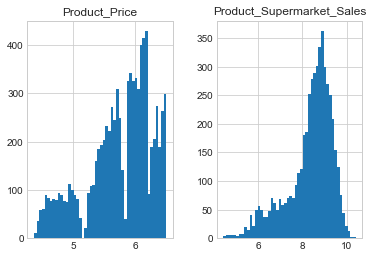

In [91]:
np.log(merged[['Product_Price','Product_Supermarket_Sales']]).hist(bins=50)
display(np.log(merged[['Product_Price','Product_Supermarket_Sales']]).describe())

In [159]:
merged['Product_Supermarket_Sales_Log'] = np.log(merged['Product_Supermarket_Sales'])
merged['Product_Price_Log'] = np.log(merged['Product_Price'])

,Product_Price,Product_Supermarket_Sales
count,8522.000000,4990.000000
mean,1.743795,2.112487
std,0.095588,0.135589
min,1.472393,1.486503
25%,1.697016,2.069661
50%,1.771386,2.150535
75%,1.814852,2.202813
max,1.872282,2.341389


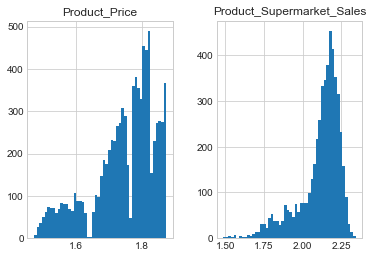

In [92]:
np.log(np.log(merged[['Product_Price','Product_Supermarket_Sales']])).hist(bins=50)
display(np.log(np.log(merged[['Product_Price','Product_Supermarket_Sales']])).describe())

## Scatter Plot

In [148]:
# Split the dataset for bivariate analysis
"""Let's split the train and test set to feed machine learning algorithm."""
train = merged.iloc[:4990, :]
test  = merged.iloc[4990:, :]

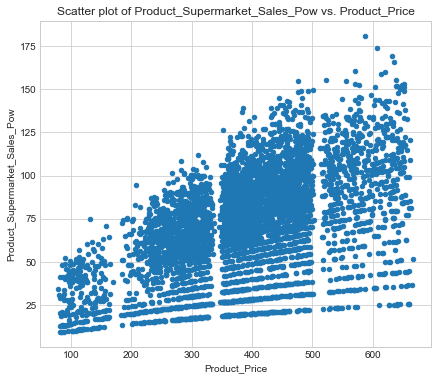

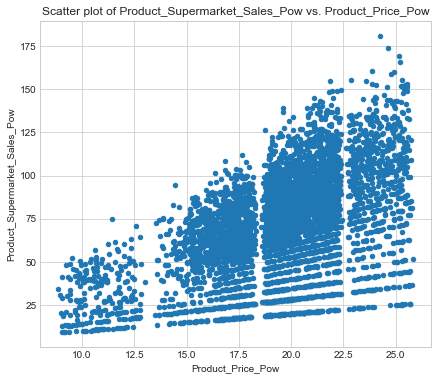

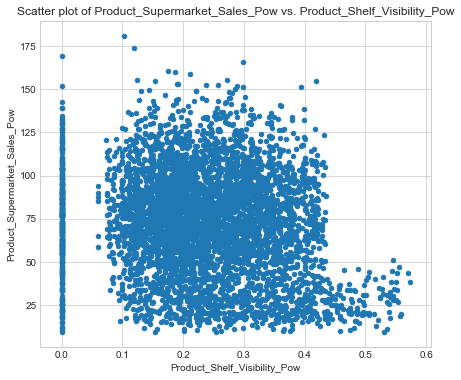

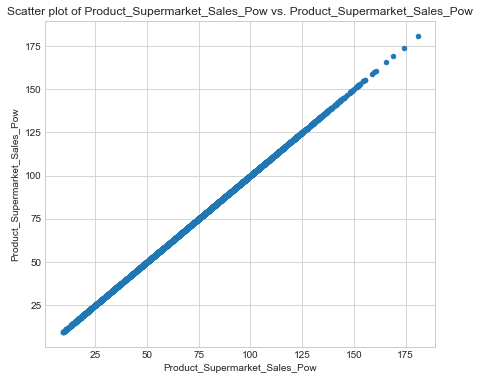

In [150]:
def plot_scatter(train_data, cols, col_y='Product_Supermarket_Sales_Pow'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        train_data.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter(train, ['Product_Price','Product_Price_Pow','Product_Shelf_Visibility_Pow','Product_Supermarket_Sales_Pow']) 

In [ ]:
merged[['Supermarket_Opening_Year',]]

## Box Plot

In [ ]:
print('HI')

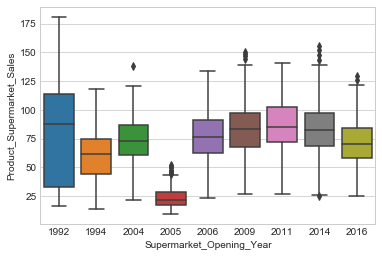

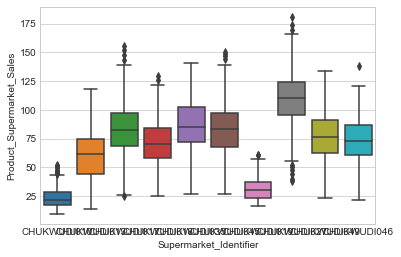

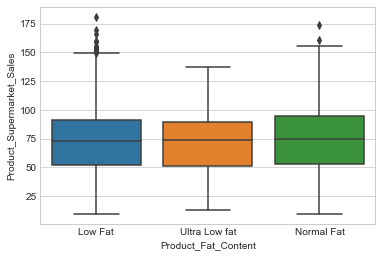

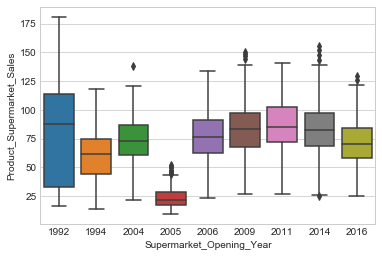

ValueError: Could not interpret input 'Supermarket_Size'

In [101]:
def plot_box(train_data, cols, col_y = 'Product_Supermarket_Sales'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, y = pow(train_data['Product_Supermarket_Sales'],0.5), data=train_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(train, cat_cols) 

### Visualize relationship between three values

In [33]:
list(cat_cols)

['Supermarket_Opening_Year',
 'Supermarket_Identifier',
 'Product_Fat_Content',
 'Supermarket_Opening_Year',
 'Supermarket_Size',
 'Supermarket_Location_Type',
 'Supermarket_Type']

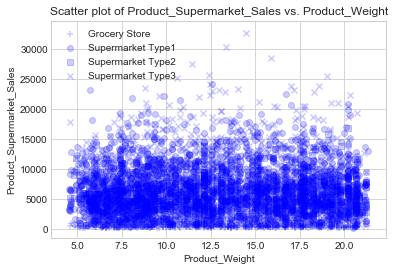

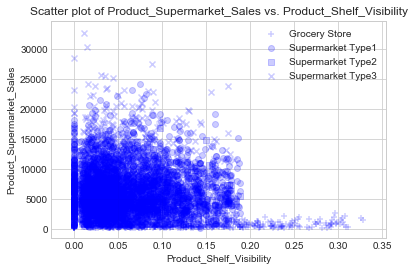

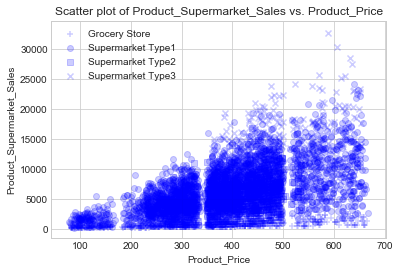

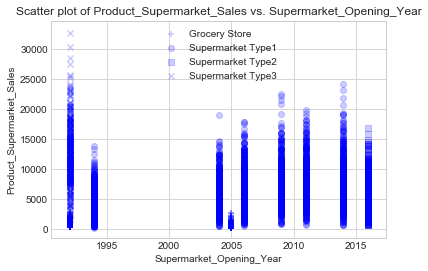

In [35]:
def plot_scatter_shape(data, cols, shape_col = 'Supermarket_Type', col_y = 'Product_Supermarket_Sales', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = data[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = data[data[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
plot_scatter_shape(train, num_cols)                

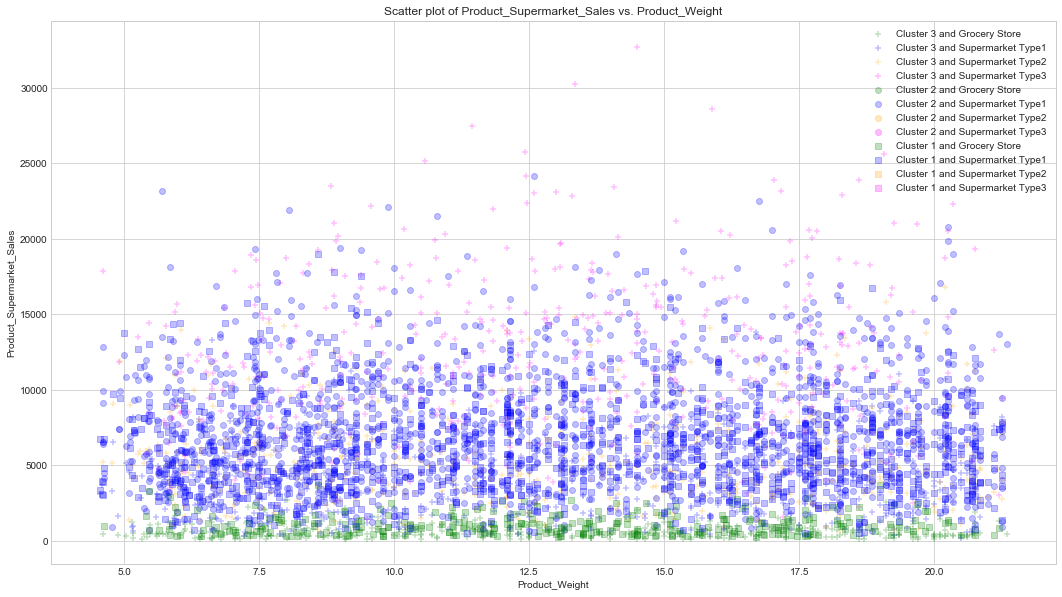

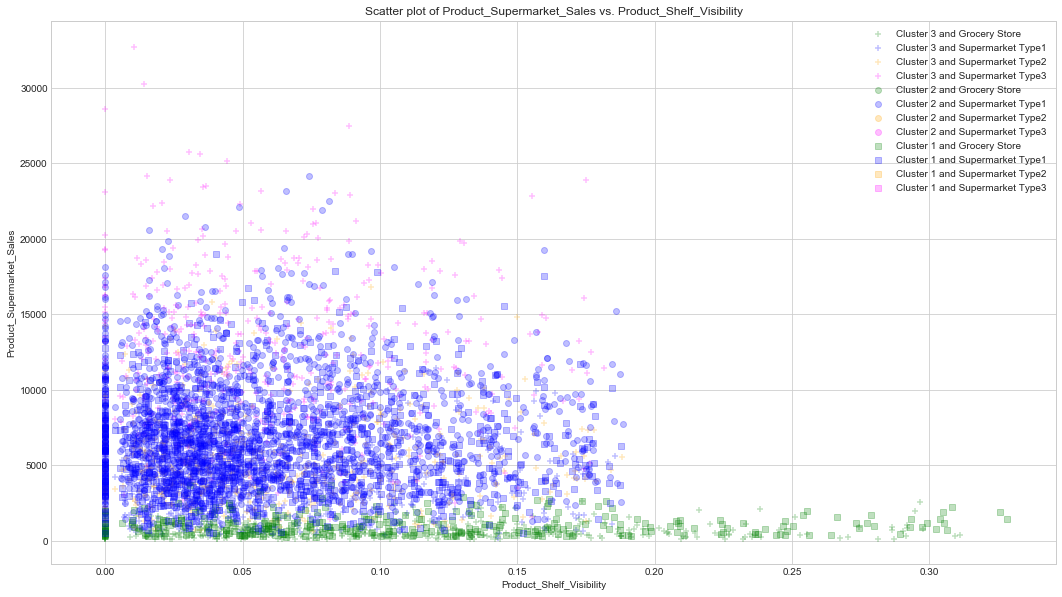

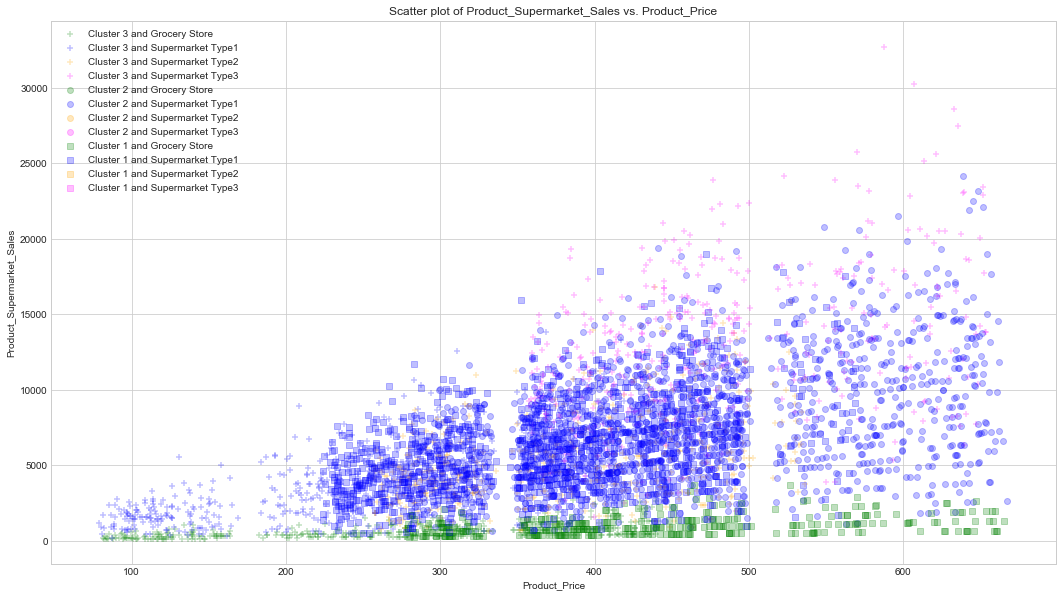

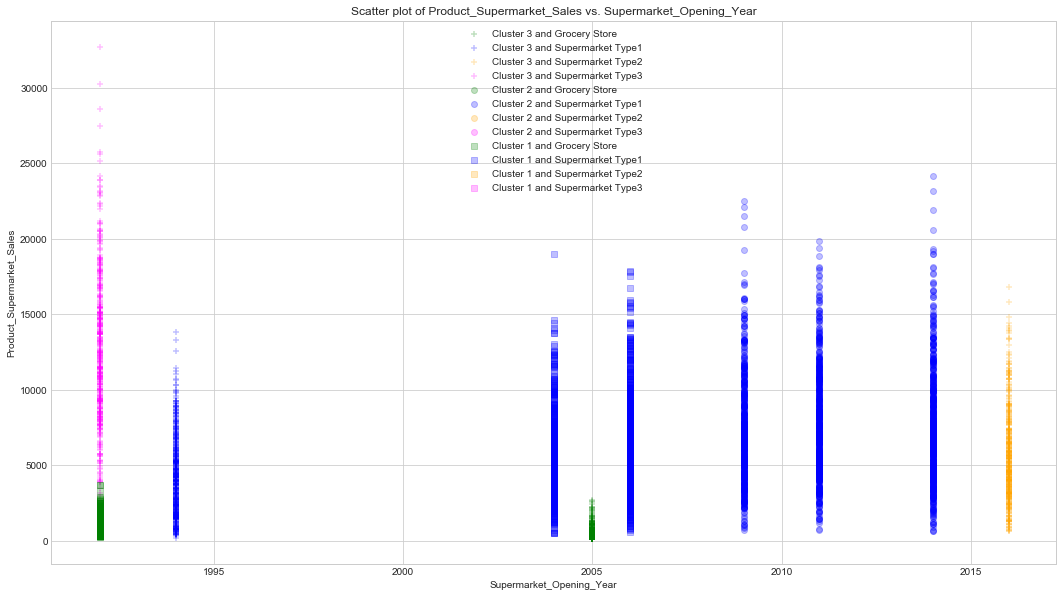

In [46]:
def plot_scatter_shape_size_col(data, cols, shape_col = 'Supermarket_Location_Type', size_col = 'Product_Weight',
                            size_mul = 0.000025, color_col = 'Supermarket_Type', col_y = 'Product_Supermarket_Sales', alpha = 0.25):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    colors = ['green', 'blue', 'orange', 'magenta', 'gray'] # specify distinctive colors
    unique_cats = data[shape_col].unique()
    unique_colors = data[color_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        fig = plt.figure(figsize=(18,10))
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            for j, color in enumerate(unique_colors):
                temp = data[(data[shape_col] == cat) & (data[color_col] == color)]
                sns.regplot(col, col_y, data=temp, marker = shapes[i],
                            scatter_kws={"alpha":alpha}, 
                            label = (cat + ' and ' + color), fit_reg = False, color = colors[j])
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
       
plot_scatter_shape_size_col(train, num_cols)     

In [74]:
aa = merged[(merged['Product_Supermarket_Sales'] < 20000) & (merged['Product_Supermarket_Sales'] > 2500) & (merged['Product_Price'] > 505)]
aa['Supermarket_Location_Type'].value_counts()

Cluster 2    417
Cluster 3    131
Cluster 1     54
Name: Supermarket_Location_Type, dtype: int64

In [16]:
merged.head()

,Product_Fat_Content,Product_Identifier,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Type,Product_Weight,Supermarket_Size,Supermarket_Identifier,Supermarket_Location_Type,Supermarket_Opening_Year,Supermarket_Type
0,Low Fat,DRA12,357.54,0.068535,DRA12_CHUKWUDI010,709.08,Soft Drinks,11.6,NaN,CHUKWUDI010,Cluster 3,2005,Grocery Store
1,Low Fat,DRA12,355.79,0.040912,DRA12_CHUKWUDI013,6381.69,Soft Drinks,11.6,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1
2,Low Fat,DRA12,350.79,0.041178,DRA12_CHUKWUDI017,6381.69,Soft Drinks,11.6,NaN,CHUKWUDI017,Cluster 2,2014,Supermarket Type1
3,Low Fat,DRA12,355.04,0.041113,DRA12_CHUKWUDI018,2127.23,Soft Drinks,11.6,Medium,CHUKWUDI018,Cluster 3,2016,Supermarket Type2
4,Ultra Low fat,DRA12,354.79,0.000000,DRA12_CHUKWUDI035,2481.77,Soft Drinks,11.6,Small,CHUKWUDI035,Cluster 2,2011,Supermarket Type1


**
    Form some features from the mark down plot above
**

In [151]:
# Max, Min and Ave using merged.groupby('Supermarket_Type')['Product_Supermarket_Sales']

merged['Type_Sales_Ave_SMT'] = merged.groupby('Supermarket_Type')['Product_Supermarket_Sales'].transform(lambda x: x.mean())
merged['Type_Sales_Min_SMT'] = merged.groupby('Supermarket_Type')['Product_Supermarket_Sales'].transform(lambda x: x.min())
merged['Type_Sales_Max_SMT'] = merged.groupby('Supermarket_Type')['Product_Supermarket_Sales'].transform(lambda x: x.max())

In [152]:
# Max, Min and Ave using merged.groupby('Supermarket_Location_Type')['Product_Supermarket_Sales']

merged['Type_Sales_Ave_SMLT'] = merged.groupby('Supermarket_Location_Type')['Product_Supermarket_Sales'].transform(lambda x: x.mean())
merged['Type_Sales_Min_SMLT'] = merged.groupby('Supermarket_Location_Type')['Product_Supermarket_Sales'].transform(lambda x: x.min())
merged['Type_Sales_Max_SMLT'] = merged.groupby('Supermarket_Location_Type')['Product_Supermarket_Sales'].transform(lambda x: x.max())

In [153]:
'''Create bin categories for Product Price.'''
label_names_cat = ['price_div1','price_div2','price_div3','price_div4']
label_names_num = [125,260,440,600]

#cut_points = [0,5,12,18,35,60,81]
cut_points = [0.0,173.0,330.0,505.0,800.0]

merged['Price_Binned_Cat'] = pd.cut(merged.Product_Price, cut_points, labels = label_names_cat)
merged['Price_Binned_Num'] = pd.cut(merged.Product_Price, cut_points, labels = label_names_num)


In [154]:
merged.Price_Binned_Num = pd.to_numeric(merged.Price_Binned_Num)

In [155]:
merged.dtypes

Product_Identifier                  object
Product_Price                      float64
Product_Shelf_Visibility           float64
Product_Supermarket_Identifier      object
Product_Supermarket_Sales          float64
Product_Type                        object
Supermarket_Size                    object
Supermarket_Identifier              object
Supermarket_Location_Type           object
Supermarket_Opening_Year             int64
Supermarket_Type                    object
Product_Supermarket_Sales_Pow      float64
Product_Price_Pow                  float64
Product_Shelf_Visibility_Pow       float64
Type_Sales_Ave_SMT                 float64
Type_Sales_Min_SMT                 float64
Type_Sales_Max_SMT                 float64
Type_Sales_Ave_SMLT                float64
Type_Sales_Min_SMLT                float64
Type_Sales_Max_SMLT                float64
Price_Binned_Cat                  category
Price_Binned_Num                     int64
dtype: object

In [41]:
merged['Product_Supermarket_Sales'].head(10)

0      709.08
1     6381.69
2     6381.69
3     2127.23
4     2481.77
5     9572.54
6      818.93
7    11055.61
8     2866.27
9     1228.40
Name: Product_Supermarket_Sales, dtype: float64

## Heat map

C:\Users\onyekachukwu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\Users\onyekachukwu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


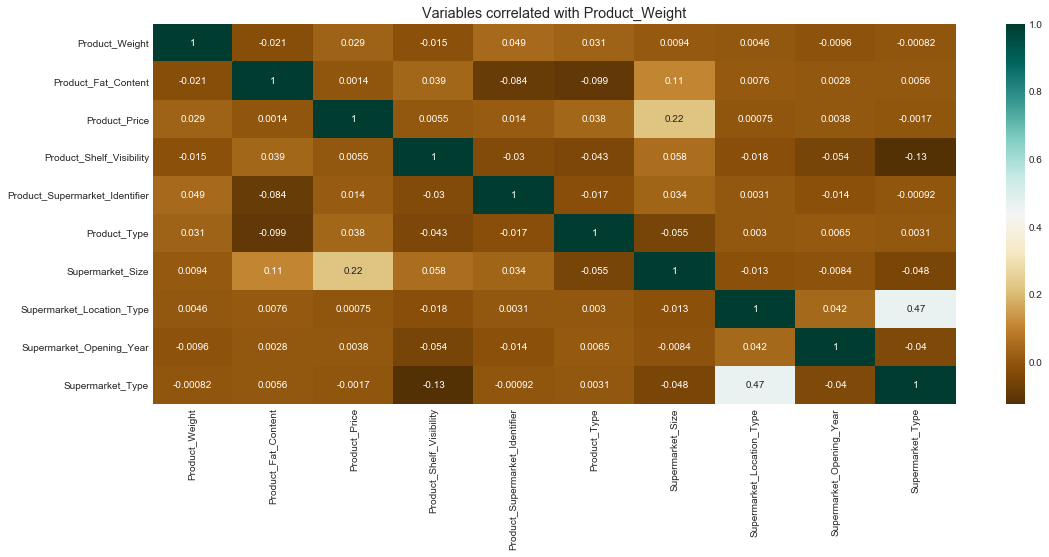

In [298]:
"""Let's plot correlation heatmap to see which variable is highly correlated with Age and if our boxplot interpretation holds true. We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical."""
correlation = merged.loc[:, ['Product_Fat_Content', 'Product_Price','Product_Shelf_Visibility', 'Product_Supermarket_Identifier', 'Product_Type', 'Supermarket_Size', 'Supermarket_Location_Type', 'Supermarket_Opening_Year', 'Supermarket_Type']]
plt.rcParams['figure.figsize'] = [18,7]

from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Product_Weight'] = merged.Product_Weight # Inserting Age in dataframe correlation
correlation = correlation.set_index('Product_Weight').reset_index() # Move Age at index 0.

'''Now create the heatmap correlation.'''
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables correlated with Product_Weight')
plt.show()

In [132]:
merged.groupby(['Supermarket_Type','Supermarket_Location_Type','Supermarket_Opening_Year','Supermarket_Identifier'])['Product_Supermarket_Sales'].sum()

Supermarket_Type   Supermarket_Location_Type  Supermarket_Opening_Year  Supermarket_Identifier
Grocery Store      Cluster 1                  1992                      CHUKWUDI019                357844.32
                   Cluster 3                  2005                      CHUKWUDI010                240638.60
Supermarket Type1  Cluster 1                  2004                      CHUKWUDI046               2945704.10
                                              2006                      CHUKWUDI049               3934626.95
                   Cluster 2                  2009                      CHUKWUDI045               3567311.83
                                              2011                      CHUKWUDI035               4058828.52
                                              2014                      CHUKWUDI017               4370201.60
                   Cluster 3                  1994                      CHUKWUDI013               2407829.22
Supermarket Type2  Cluster 3     

In [131]:
merged.groupby(['Supermarket_Type','Supermarket_Location_Type','Supermarket_Opening_Year'])['Supermarket_Size'].count()

Supermarket_Type   Supermarket_Location_Type  Supermarket_Opening_Year
Grocery Store      Cluster 1                  1992                        528
                   Cluster 3                  2005                          0
Supermarket Type1  Cluster 1                  2004                        930
                                              2006                        930
                   Cluster 2                  2009                          0
                                              2011                        930
                                              2014                          0
                   Cluster 3                  1994                        932
Supermarket Type2  Cluster 3                  2016                        928
Supermarket Type3  Cluster 3                  1992                        935
Name: Supermarket_Size, dtype: int64

### Merge some columns

In [168]:
merged.loc[merged['Supermarket_Opening_Year'] == 2005,'Supermarket_Size'] = 'Small'
merged.loc[merged['Supermarket_Opening_Year'] == 2009,'Supermarket_Size'] = 'Small'
merged.loc[merged['Supermarket_Opening_Year'] == 2014,'Supermarket_Size'] = 'Small'

In [157]:
merged["Supermarket_Type_&_Supermarket_Size"] = merged["Supermarket_Type"] + merged["Supermarket_Size"]

In [158]:
'''Create bin categories for Age.'''
#label_names = ['infant','child','teenager','young_adult','adult','aged']
label_names = ['invisible','p_Invisible','p_visible','visible','v_visible1','v_visible2']

cut_points = [-0.01,0.02,0.04,0.08,0.16,0.20,0.35]

merged['Product_Shelf_Visibility_Binned'] = pd.cut(merged.Product_Shelf_Visibility, cut_points, labels = label_names)

In [80]:
#train_data.drop('Product_Shelf_Visibility_Binned', axis=1, inplace=True)
merged[10:20]

,Product_Fat_Content,Product_Identifier,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Type,Product_Weight,Supermarket_Size,Supermarket_Identifier,...,Supermarket_Type,Type_Sales_Ave,Type_Sales_Max,Type_Sales_Min,Price_Binned_Cat,Price_Binned_Num,Supermarket_Location_Type_&_Supermarket_Type,Supermarket_Type_&_Supermarket_Size,Supermarket_Location_Type_&_Supermarket_Size,Product_Shelf_Visibility_Binned
10,Normal Fat,DRA24,414.47,0.039735,DRA24_CHUKWUDI027,12284.01,Soft Drinks,19.35,Medium,CHUKWUDI027,...,Supermarket Type3,12561.189697,32717.41,1423.15,price_div3,440,Cluster 3Supermarket Type3,Supermarket Type3Medium,Cluster 3Medium,p_Invisible
11,Normal Fat,DRA24,408.47,0.039921,DRA24_CHUKWUDI035,8598.81,Soft Drinks,19.35,Small,CHUKWUDI035,...,Supermarket Type1,6442.040623,24161.88,183.10,price_div3,440,Cluster 2Supermarket Type1,Supermarket Type1Small,Cluster 2Small,p_Invisible
12,Normal Fat,DRA24,412.72,0.039990,DRA24_CHUKWUDI049,2456.80,Soft Drinks,19.35,Medium,CHUKWUDI049,...,Supermarket Type1,6442.040623,24161.88,183.10,price_div3,440,Cluster 1Supermarket Type1,Supermarket Type1Medium,Cluster 1Medium,p_Invisible
13,Normal Fat,DRA59,458.23,0.000000,DRA59_CHUKWUDI017,6015.50,Soft Drinks,8.27,Small,CHUKWUDI017,...,Supermarket Type1,6442.040623,24161.88,183.10,price_div3,440,Cluster 2Supermarket Type1,Supermarket Type1Small,Cluster 2Small,invisible
14,Normal Fat,DRA59,466.48,0.128449,DRA59_CHUKWUDI018,11105.54,Soft Drinks,8.27,Medium,CHUKWUDI018,...,Supermarket Type2,5540.621680,16824.77,622.52,price_div3,440,Cluster 3Supermarket Type2,Supermarket Type2Medium,Cluster 3Medium,visible
15,Normal Fat,DRA59,465.73,0.223985,DRA59_CHUKWUDI019,1388.19,Soft Drinks,8.27,Small,CHUKWUDI019,...,Grocery Store,826.633867,3705.18,83.23,price_div3,440,Cluster 1Grocery Store,Grocery StoreSmall,Cluster 1Small,v_visible2
16,Normal Fat,DRA59,466.73,0.127308,DRA59_CHUKWUDI027,17583.78,Soft Drinks,8.27,Medium,CHUKWUDI027,...,Supermarket Type3,12561.189697,32717.41,1423.15,price_div3,440,Cluster 3Supermarket Type3,Supermarket Type3Medium,Cluster 3Medium,visible
17,Normal Fat,DRA59,462.23,0.127928,DRA59_CHUKWUDI046,11105.54,Soft Drinks,8.27,Small,CHUKWUDI046,...,Supermarket Type1,6442.040623,24161.88,183.10,price_div3,440,Cluster 1Supermarket Type1,Supermarket Type1Small,Cluster 1Small,visible
18,Normal Fat,DRA59,459.23,0.128127,DRA59_CHUKWUDI049,3239.12,Soft Drinks,8.27,Medium,CHUKWUDI049,...,Supermarket Type1,6442.040623,24161.88,183.10,price_div3,440,Cluster 1Supermarket Type1,Supermarket Type1Medium,Cluster 1Medium,visible
19,Low Fat,DRB01,475.13,0.081841,DRB01_CHUKWUDI027,1423.15,Soft Drinks,7.39,Medium,CHUKWUDI027,...,Supermarket Type3,12561.189697,32717.41,1423.15,price_div3,440,Cluster 3Supermarket Type3,Supermarket Type3Medium,Cluster 3Medium,visible


In [161]:
merged[['Product_Supermarket_Sales_Pow']].to_csv('TrainLabelPow.csv', index=False)
merged[['Product_Supermarket_Sales_Log']].to_csv('TrainLabelLog.csv', index=False)

In [162]:
merged.drop(['Product_Supermarket_Sales','Product_Identifier','Product_Supermarket_Identifier','Product_Supermarket_Sales_Pow','Product_Supermarket_Sales_Log'], axis=1, inplace=True)

In [163]:
merged.head()

,Product_Price,Product_Shelf_Visibility,Product_Type,Supermarket_Size,Supermarket_Identifier,Supermarket_Location_Type,Supermarket_Opening_Year,Supermarket_Type,Product_Price_Pow,Product_Shelf_Visibility_Pow,...,Type_Sales_Max_SMT,Type_Sales_Ave_SMLT,Type_Sales_Min_SMLT,Type_Sales_Max_SMLT,Price_Binned_Cat,Price_Binned_Num,Supermarket_Type_&_Supermarket_Size,Product_Shelf_Visibility_Binned,Product_Price_Log,Product_Shelf_Visibility_Exp
0,357.54,0.068535,Soft Drinks,Medium,CHUKWUDI010,Cluster 3,2005,Grocery Store,18.908728,0.261792,...,3705.18,5784.560979,83.23,32717.41,price_div3,440,Grocery StoreMedium,p_visible,5.879247,1.070938
1,355.79,0.040912,Soft Drinks,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1,18.862396,0.202267,...,24161.88,5784.560979,83.23,32717.41,price_div3,440,Supermarket Type1High,p_visible,5.874341,1.041760
2,350.79,0.041178,Soft Drinks,Small,CHUKWUDI017,Cluster 2,2014,Supermarket Type1,18.729389,0.202922,...,24161.88,7587.819070,632.51,24161.88,price_div3,440,Supermarket Type1Small,p_visible,5.860188,1.042037
3,355.04,0.041113,Soft Drinks,Medium,CHUKWUDI018,Cluster 3,2016,Supermarket Type2,18.842505,0.202763,...,16824.77,5784.560979,83.23,32717.41,price_div3,440,Supermarket Type2Medium,p_visible,5.872230,1.041970
4,354.79,0.000000,Soft Drinks,Small,CHUKWUDI035,Cluster 2,2011,Supermarket Type1,18.835870,0.000000,...,24161.88,7587.819070,632.51,24161.88,price_div3,440,Supermarket Type1Small,invisible,5.871526,1.000000


## Separate the merged dataset

In [170]:
(4990, 13)
(3532, 12)
(8522, 13)

# Split the dataset for bivariate analysis
"""Let's split the train and test set to feed machine learning algorithm."""
train = merged.iloc[:4990, :]
test  = merged.iloc[4990:, :]

#### Having removed the labels column, saved the remaining features

In [171]:
test.to_csv('TestFeatures4TreesNew2.csv', index=False)

In [172]:
train.to_csv('TrainFeatures4TreesNew2.csv', index=False)

In [167]:
pd.read_csv('TestFeatures4TreesNew1.csv').isnull().sum()

Product_Price                          0
Product_Shelf_Visibility               0
Product_Type                           0
Supermarket_Size                       0
Supermarket_Identifier                 0
Supermarket_Location_Type              0
Supermarket_Opening_Year               0
Supermarket_Type                       0
Product_Price_Pow                      0
Product_Shelf_Visibility_Pow           0
Type_Sales_Ave_SMT                     0
Type_Sales_Min_SMT                     0
Type_Sales_Max_SMT                     0
Type_Sales_Ave_SMLT                    0
Type_Sales_Min_SMLT                    0
Type_Sales_Max_SMLT                    0
Price_Binned_Cat                       0
Price_Binned_Num                       0
Supermarket_Type_&_Supermarket_Size    0
Product_Shelf_Visibility_Binned        0
Product_Price_Log                      0
Product_Shelf_Visibility_Exp           0
dtype: int64